In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#read in the data
mlc_data = pd.read_csv("../data/Matching Sample for NSS (100k Lines).xlsx - MLC Data Sample.csv")

In [4]:
#let's see what we're working with and that it was read in correctly
mlc_data.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [5]:
#let's check the tail too
mlc_data.tail()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1
99999,QZK6F2019397,QZ,K6F,20.0,2/1/2021,Spotify,"11,245",Lexie Liu,泥鞋（北京）文化传媒有限公司,黑洞 Metropolis,无限意识 Meta Ego,259,1


In [6]:
mlc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   ISRC                                       98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [15]:
mlc_data.describe()

,Year of Reference,Streams,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
count,98239.000000,1.000000e+05,100000.000000,100000.000000
mean,19.671933,5.626550e+04,1016.893690,0.541610
std,12.638870,2.620276e+05,15565.692133,0.498268
min,0.000000,1.000000e+00,0.000000,0.000000
25%,17.000000,6.807000e+03,149.000000,0.000000
50%,19.000000,1.677250e+04,190.000000,1.000000
75%,20.000000,3.990300e+04,236.000000,1.000000
max,99.000000,2.145617e+07,818738.000000,1.000000


In [10]:
#false=0, true=1. this shows count of null values for each column.
mlc_data.isnull().sum()

ISRC                                         1760
Country Code                                 1697
Registrant Code                              1697
Year of Reference                            1761
Usage Period                                 8102
Streaming Platform (DSP)                     3999
Streams                                         0
Recording Artist                                0
Recording Label                              1008
Recording Title                                 0
Release Title                                  69
Recording Duration (Seconds)                    0
Songwriter's Listed (1 = "Yes", 0 = "No")       0
dtype: int64

In [11]:
#value counts of unique values (excluding nulls) in given column.
mlc_data['Recording Artist'].value_counts()

Various artists                                                                                   967
Lil Durk                                                                                          446
Zach Bryan                                                                                        394
Youngboy Never Broke Again                                                                        335
Taylor Swift                                                                                      313
                                                                                                 ... 
Mr. Rock Ski,Madam T                                                                                1
Rauw Alejandro, Myke Towers, Jay Wheeler                                                            1
Jay Wheeler, Myke Towers & DJ Nelson (feat. Jhay Cortez, Lunay, Rauw Alejandro & Kendo Kaponi)      1
Jay Wheeler, Myke Towers & Becky G                                                

In [12]:
#value counts of unique values (excluding nulls) in given column.
mlc_data['Streaming Platform (DSP)'].value_counts()

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: Streaming Platform (DSP), dtype: int64

In [14]:
#count of unique values in that column (result is x unique names in dataframe)
mlc_data['Recording Artist'].nunique()

21149

<AxesSubplot:>

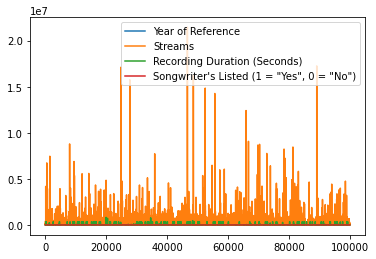

In [16]:
mlc_data.plot()

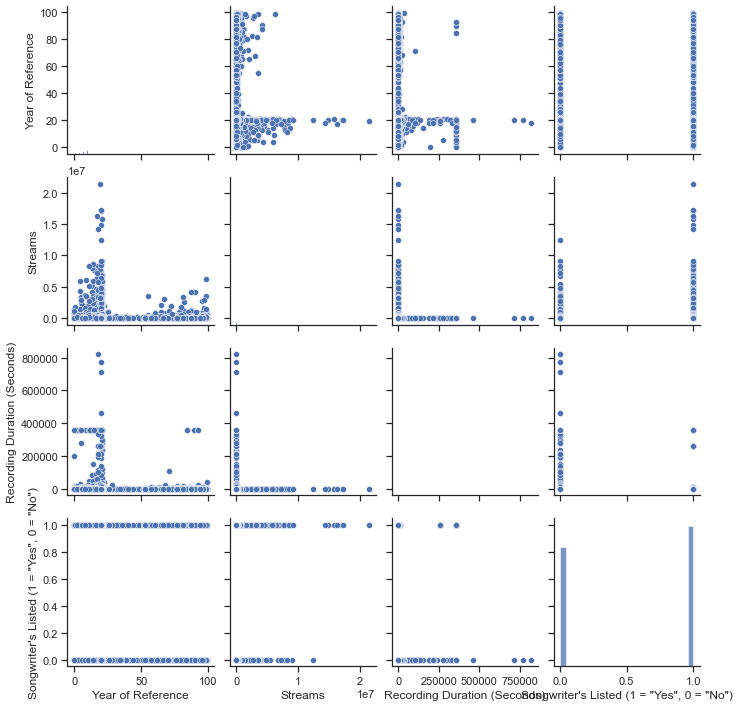

In [17]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(mlc_data);

In [7]:
#when I attempted to convert streams to int, got an error due to whitespaces. let's try to remove those
#this will require converting them to strings first
#documentation: https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
#documentation: https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/
mlc_data['Streams'] = mlc_data['Streams'].astype(str).str.strip()

In [8]:
#to calculate based on streams, need to convert to int
#at first, was getting ValueError: count not convert string to float. need to remove commas.
mlc_data['Streams'] = mlc_data['Streams'].apply(lambda x: int(float(x.replace(',',''))))

In [9]:
#I want to try aggregating this data by streaming platform, artist, recording duration, etc to see how these factors 
#impact number of streams
#going off this documentation: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#let's start by grouping by artist
#and ordering by number of streams DESC
grouped_artist = mlc_data.groupby('Recording Artist')[['Streams']].sum().sort_values(['Streams'],ascending=False)
grouped_artist.head(20)

,Streams
Recording Artist,
Lil Durk,77586607
Rod Wave,76504555
Taylor Swift,65853112
Pooh Shiesty,60734440
Moneybagg Yo,44266907
Drake,33514252
Spotemgottem,30475307
DJ Khaled,30445217
Morgan Wallen,29287713


<AxesSubplot:ylabel='Recording Duration (Seconds)'>

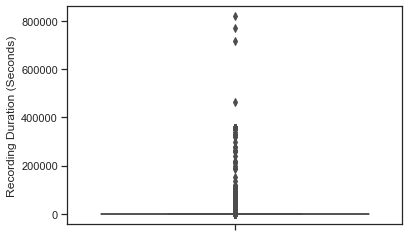

In [26]:
sns.boxplot(y=mlc_data['Recording Duration (Seconds)'])

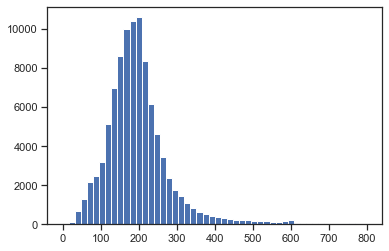

In [40]:
plt.hist('Recording Duration (Seconds)', bins = 50, range = (0, 800), data = mlc_data);